# **3 Exploratory Data Analysis (EDA): Air Quality**

In this phase of the project, our primary focus will be conducting exploratory data analysis (EDA) on the dataset generated during the preceding step (Data Wrangling). This analysis aims to provide insights into the distribution of our variables, evaluate the balance among our classes, identify any necessary additional transformations for subsequent modeling stages, and ensure the suitability of both dependent and independent variables for our classification task.

## **Methodology**

* [1. Reading data from Data Wrangling](#1_rdwr)
* [2. Basic Data Exploration and Summary Statistics](#2_bde)
* [3. Univariate Analysis](#3_uva)
    * [3.1 Stats Visualizations for Numerical Features](#31_vizn)
    * [3.2 Visualizations for Target](#32_vizcat): Mainly for checking class imbalance.
* [4. Multivariate Analysis](#4_mva)
    * [4.1 Correlation Matrix](#41_corrmat)
    * [4.2 Pairplots](#42_pairplt)
    * [4.3 Variance Inflation Factor (VIF)](#43_varif)

In [75]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [76]:
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---

### **1. Reading data from Data Wrangling**

In [77]:
# Load the staged dataset
file_path = '../data/staged/air_dataset_staged.csv' 
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

---

### **2. Basic data exploration and statistics**

In [61]:
# Snapshot of staged data
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_Quality
0,Ahmedabad,2015-01-29,83.13,95.68,6.93,28.71,33.72,15.85,6.93,49.52,59.76,0.02,0.00,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,95.68,13.85,28.68,41.08,15.85,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,95.68,24.39,32.66,52.61,15.85,24.39,67.39,111.33,0.24,0.01,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,95.68,43.48,42.08,84.57,15.85,43.48,75.23,102.70,0.40,0.04,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,95.68,54.56,35.31,72.80,15.85,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [62]:
# Staged df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         24850 non-null  object        
 1   Date         24850 non-null  datetime64[ns]
 2   PM2.5        24850 non-null  float64       
 3   PM10         24850 non-null  float64       
 4   NO           24850 non-null  float64       
 5   NO2          24850 non-null  float64       
 6   NOx          24850 non-null  float64       
 7   NH3          24850 non-null  float64       
 8   CO           24850 non-null  float64       
 9   SO2          24850 non-null  float64       
 10  O3           24850 non-null  float64       
 11  Benzene      24850 non-null  float64       
 12  Toluene      24850 non-null  float64       
 13  AQI          24850 non-null  float64       
 14  Air_Quality  24850 non-null  object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory u

In [63]:
# Staged df summary statistics
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24850,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,2018-07-24 18:51:25.714285568,66.960771,111.960285,17.502000,28.863712,31.633718,21.744651,2.319207,14.236262,34.780619,3.118872,7.988748,166.463581
min,2015-01-01 00:00:00,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,2017-08-16 00:00:00,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,81.000000
50%,2018-11-05 00:00:00,48.570000,95.680000,9.890000,21.725000,23.520000,15.850000,0.920000,9.160000,30.840000,1.070000,2.970000,118.000000
75%,2019-10-11 00:00:00,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.460000,14.890000,45.397500,2.850000,7.380000,208.000000
max,2020-07-01 00:00:00,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000
std,NaN,62.285153,76.355881,22.266453,24.449363,29.632820,22.491163,7.014226,17.233884,21.381041,14.875067,18.479885,140.696585


---

## **3. Univariate Analysis**

In this section we will do the univariate analysis

### **3.1 Stats visualizations for numerical features**

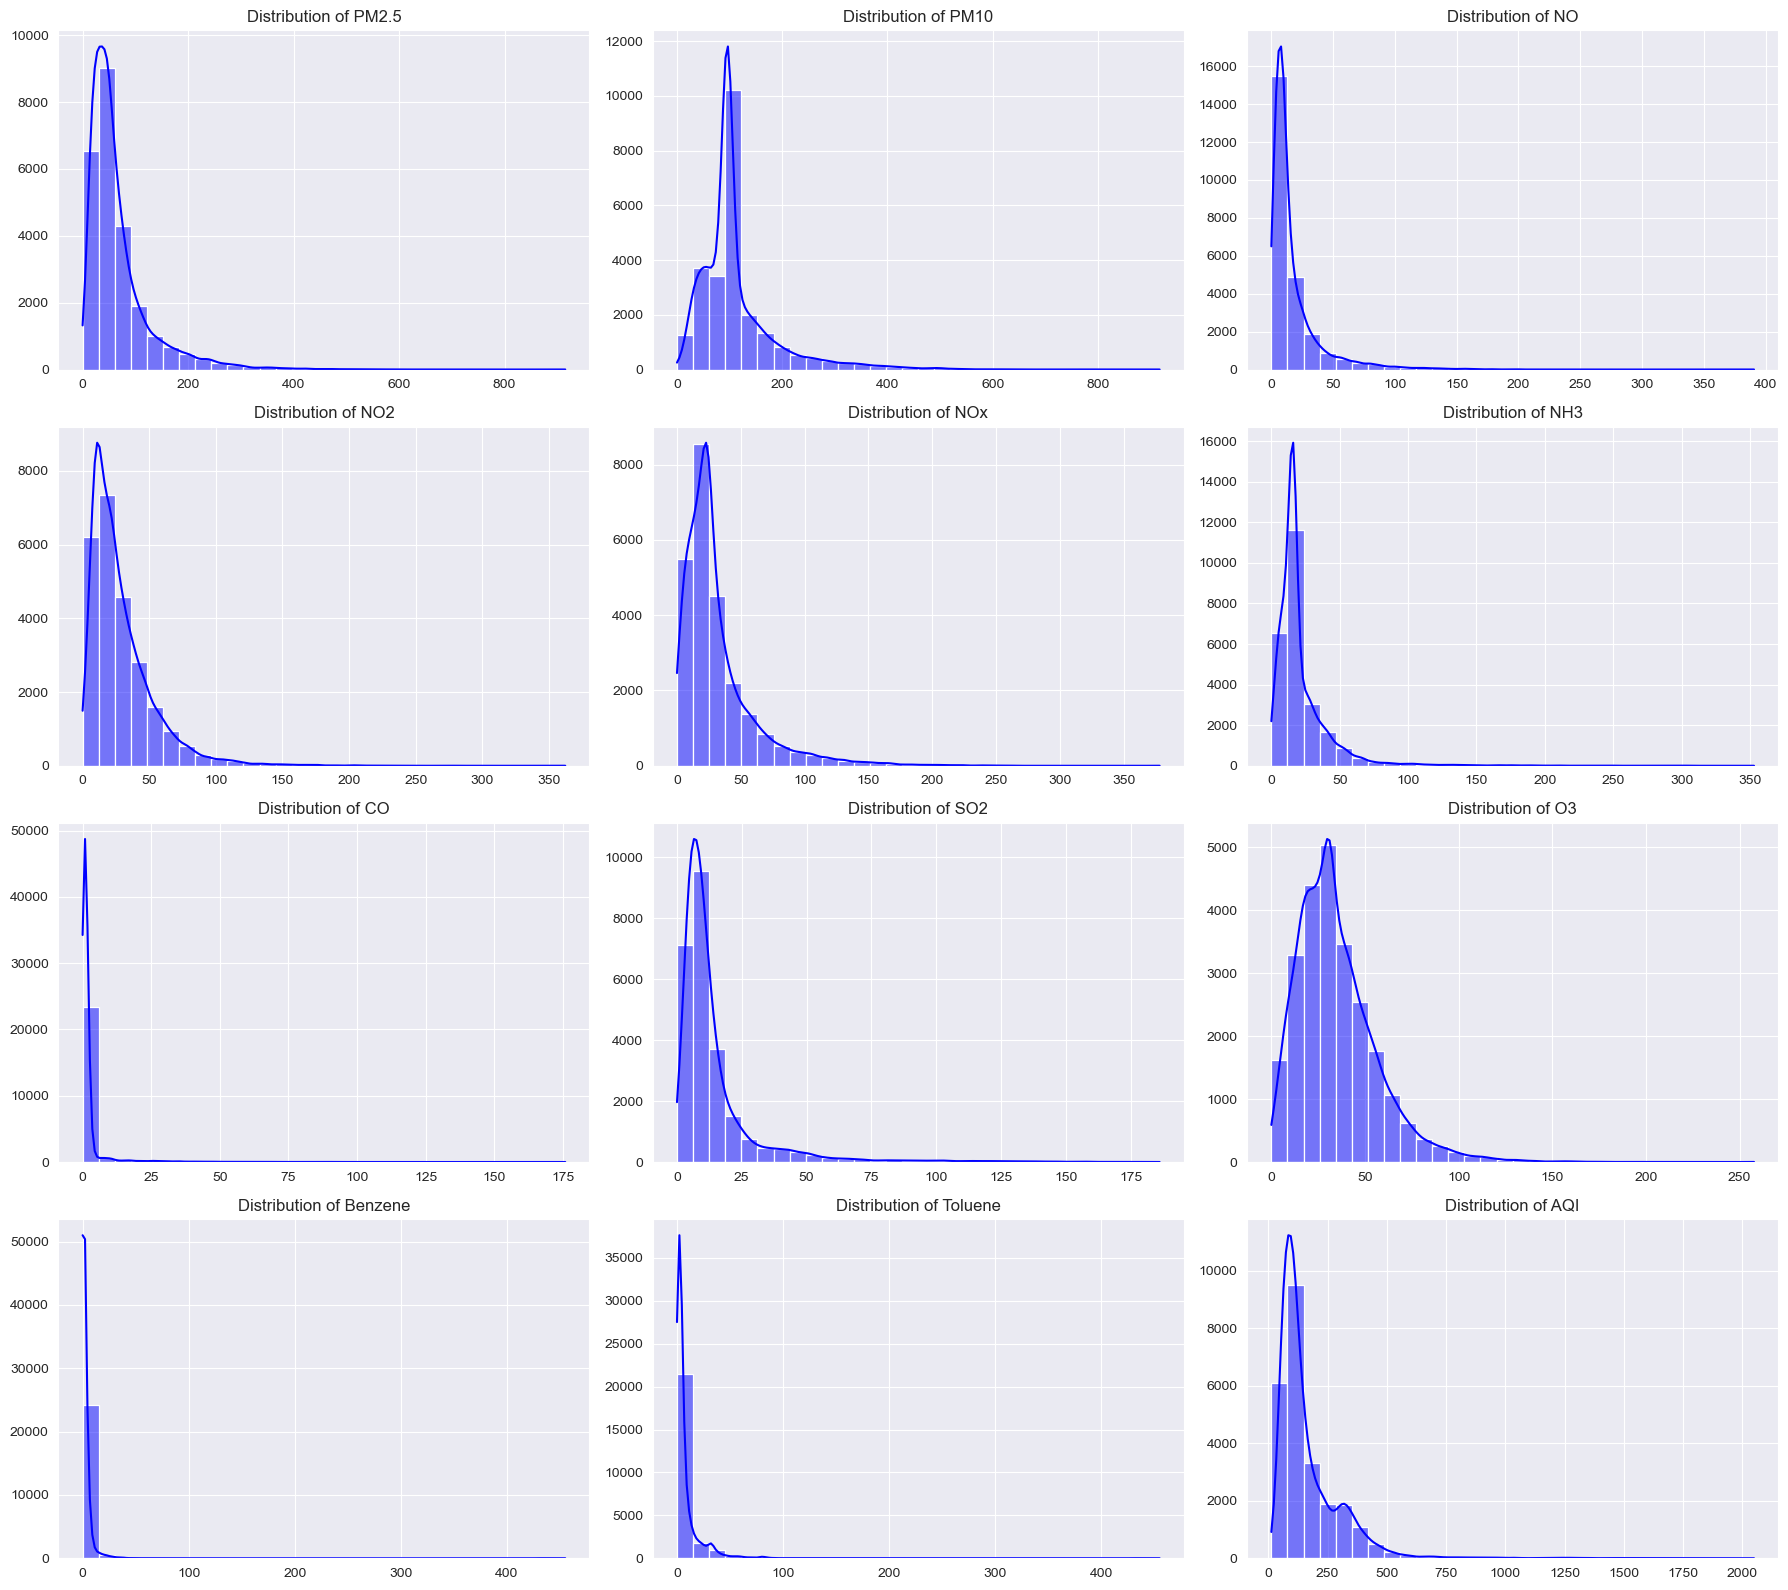

In [64]:
# Set the style
sns.set_style('darkgrid')

# Plot distributions of numerical variables
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Plot settings
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


### Analysis of Distribution Plots

1. **Skewed Distributions**:
   - Most of the variables, including `PM2.5`, `PM10`, `NO`, `NO2`, `NOx`, `NH3`, `CO`, `SO2`, `O3`, `Benzene`, and `Toluene`, exhibit right-skewed distributions. This indicates that most values are clustered at lower levels with a long tail extending to higher values.
   - The `AQI` also shows a right-skewed distribution, with the majority of values at the lower end and a few very high values.

2. **Potential Outliers**:
   - The long tails in the distributions suggest the presence of outliers. These outliers can impact the performance of certain classification algorithms.

3. **Need for Scaling**:
   - The wide range of values across different variables suggests that scaling is necessary. For example, `PM2.5` values range from 0 to over 800, while `CO` values range from 0 to around 175. This disparity can cause issues in algorithms that rely on distance calculations, such as SVM and KNN.

### Recommendation for Scaling

Given the skewed distributions and the varying ranges of values, the following preprocessing steps are recommended before applying classification algorithms:

1. **Log Transformation**:
   - Apply a log transformation to variables with highly skewed distributions to make them more normally distributed. This can help reduce the impact of outliers and improve the performance of algorithms.

2. **Standardization**:
   - Standardize the variables to have a mean of 0 and a standard deviation of 1. This ensures that all variables contribute equally to the distance calculations in distance-based algorithms.

---

### **3.2 Visualizations for target variable**

This is going to be mainly to checl for class imbalance.

In [65]:
# Check for class imbalance in the labels
df['Air_Quality'].value_counts()

Air_Quality
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

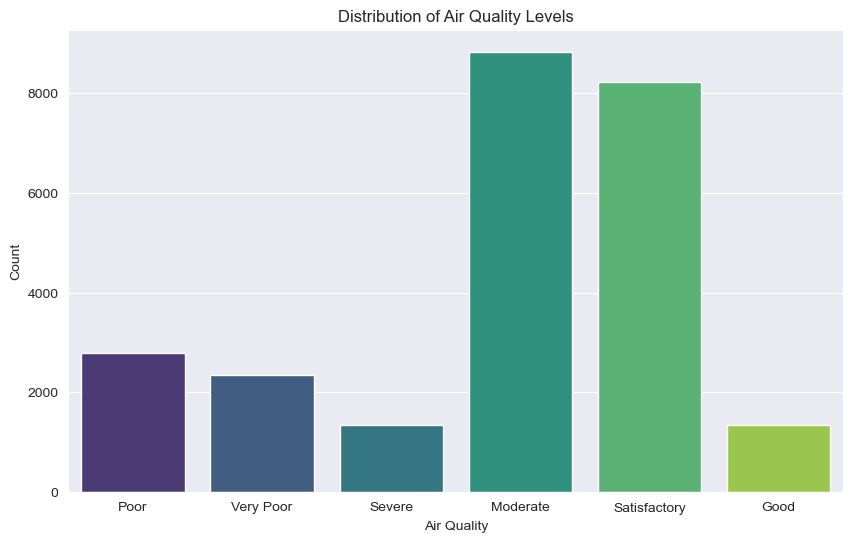

In [66]:
# Plot count of the categorical variable 'Air_Quality'
plt.figure(figsize=(10, 6))
sns.countplot(x='Air_Quality', data=df, palette='viridis')
plt.title('Distribution of Air Quality Levels')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()

---

## **4. Multivariate Analysis**

In this section, we will conduct a multivariate analysis.

### **4.1 Correlation Matrix**

The correlation matrix is the linear correlations between features.

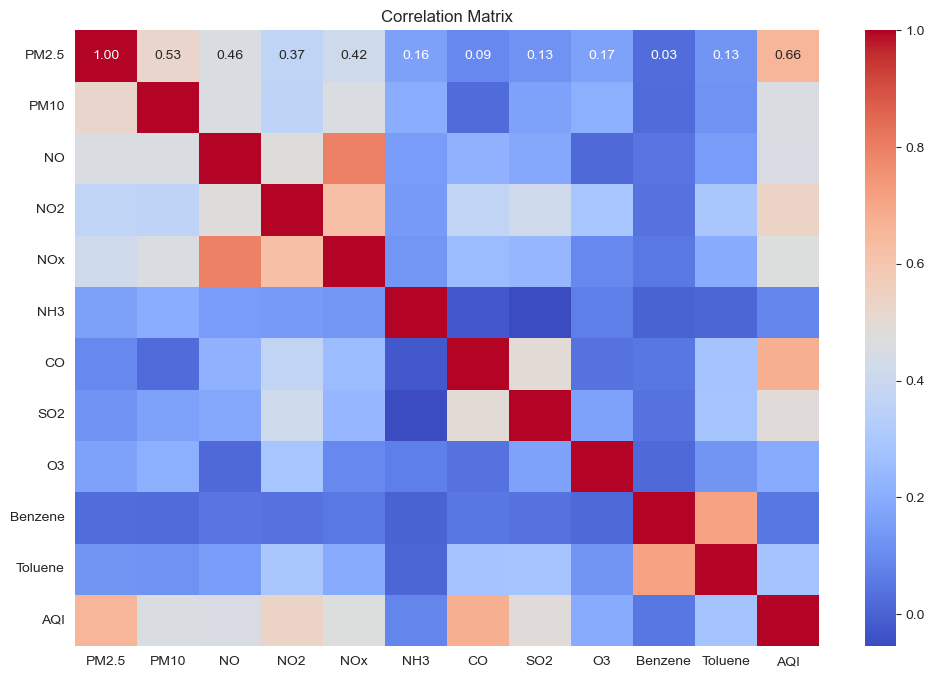

In [67]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

---

### **4.2 Pairplot for visualizing relationships**

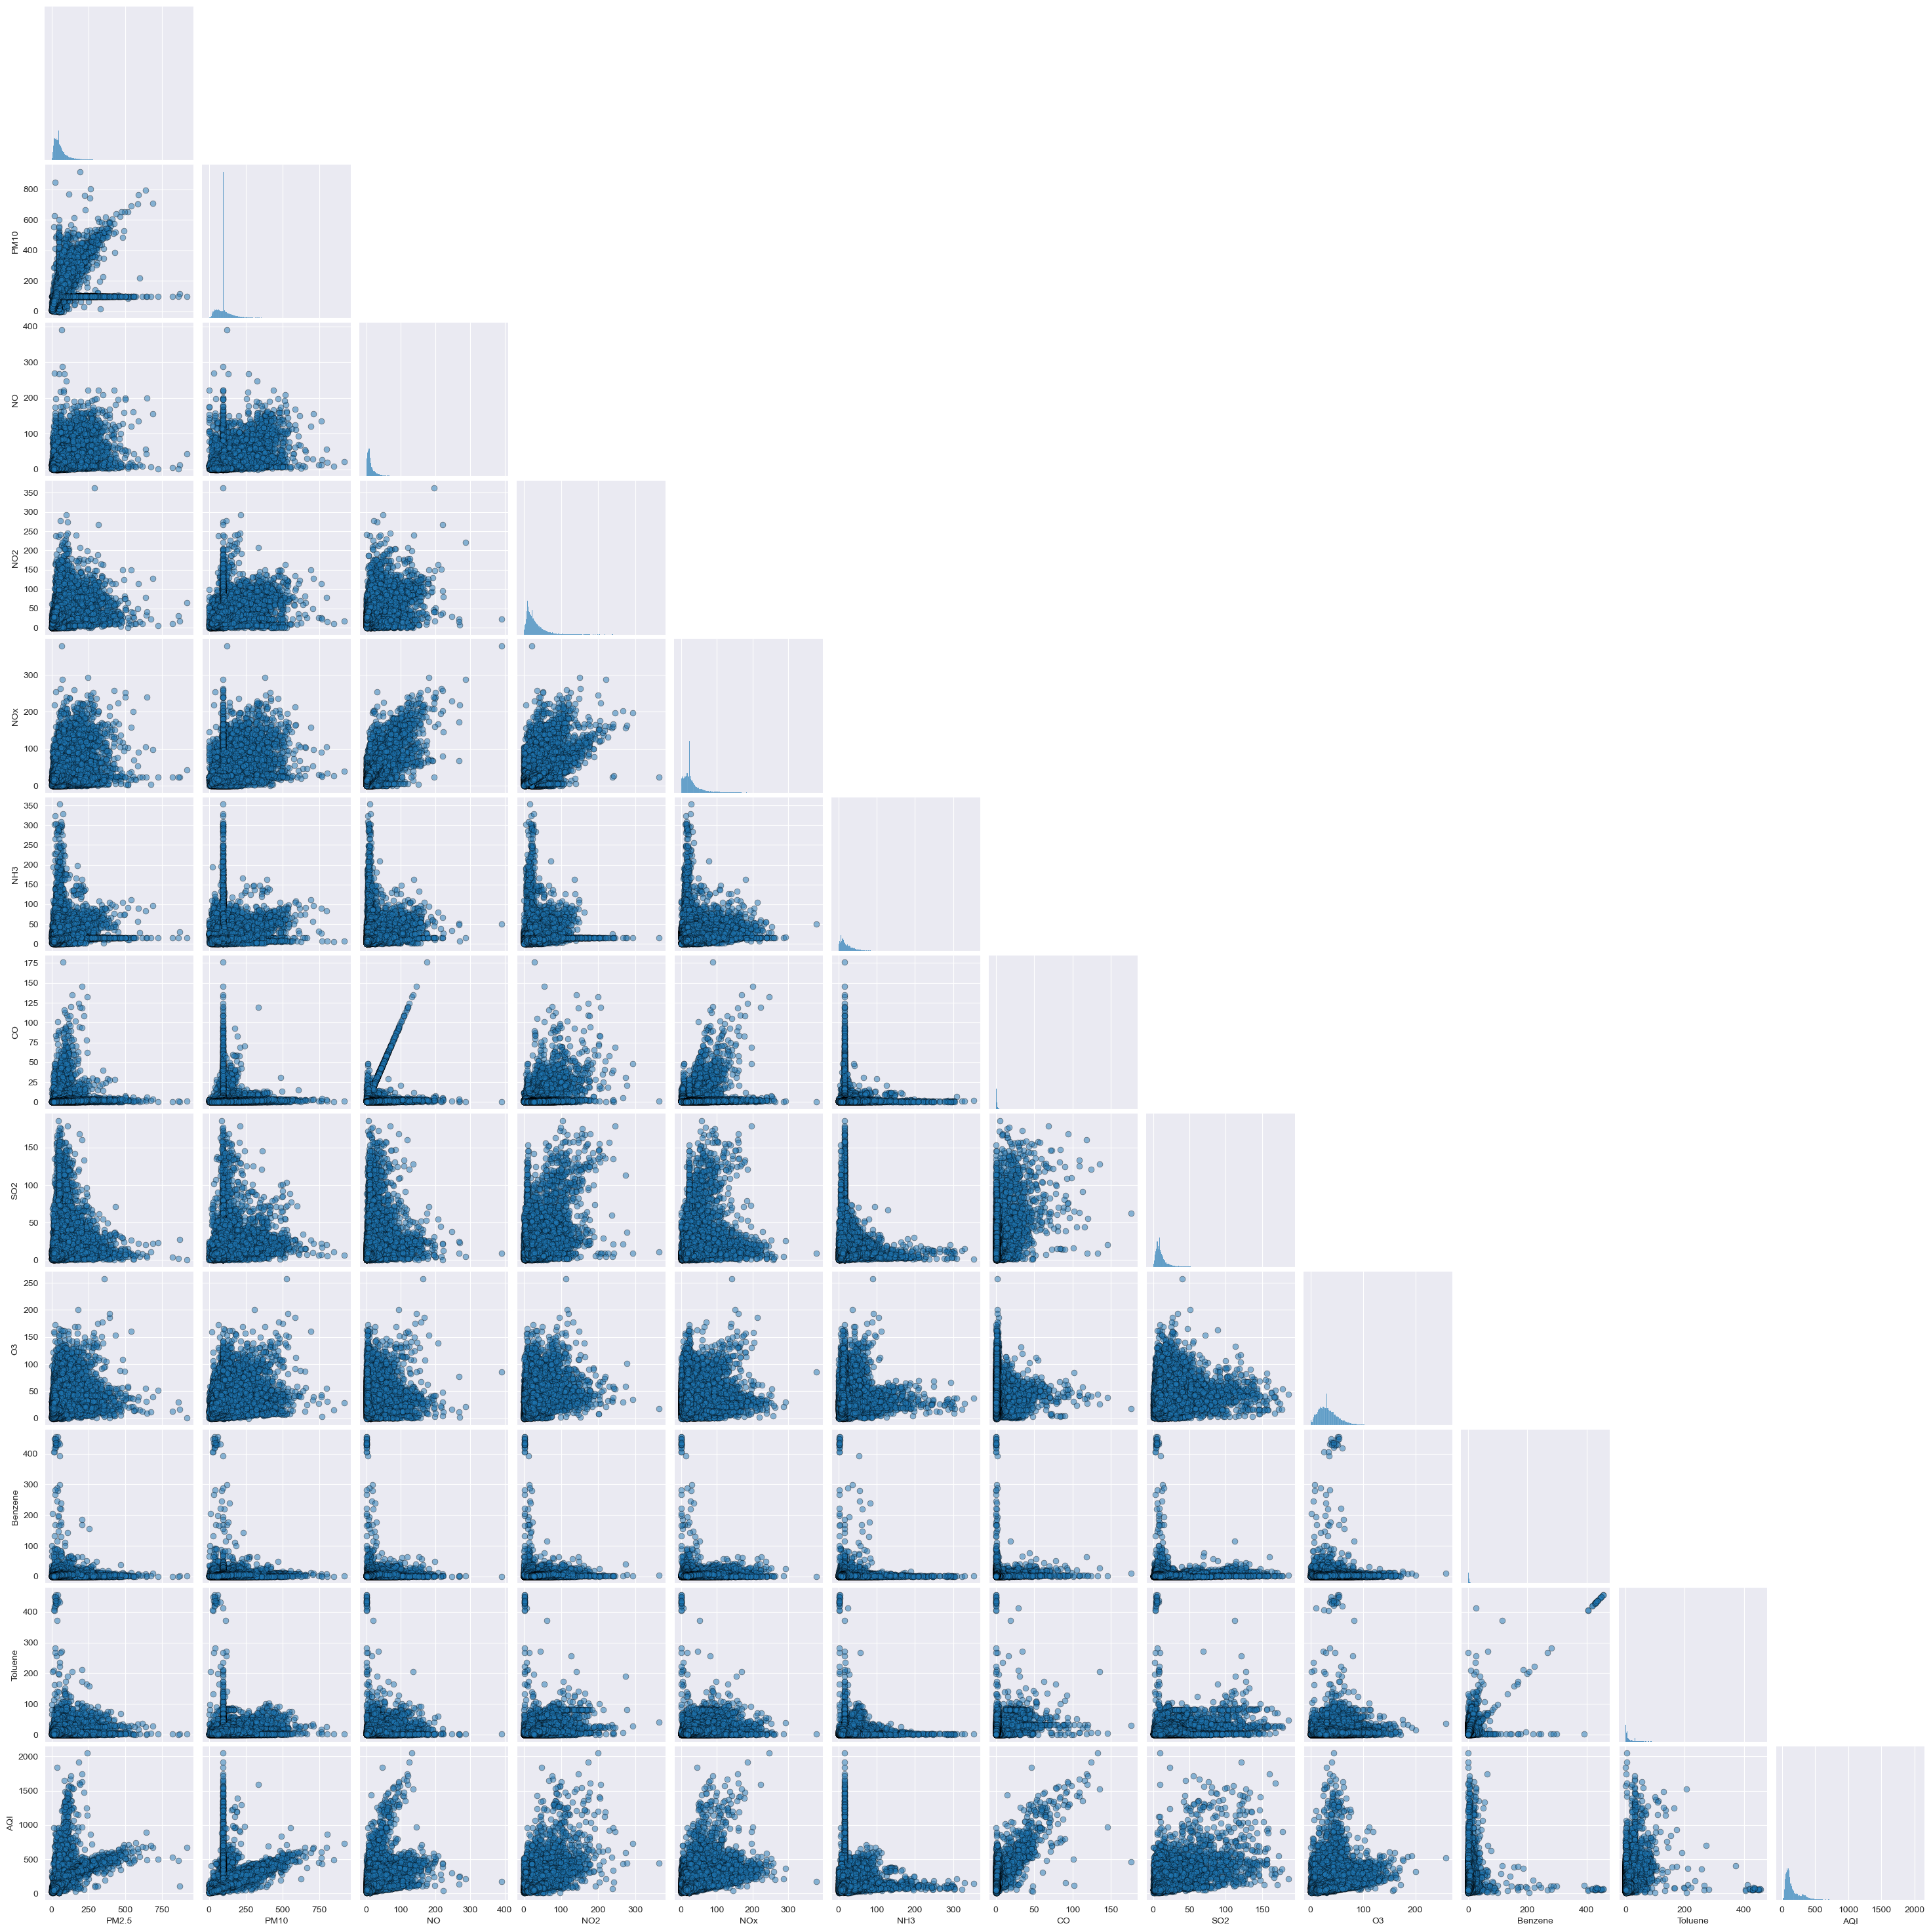

In [68]:
# Pairplot to visualize relationships between features
sns.pairplot(df[numerical_cols], corner=True, plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'})
plt.show()

---

### **4.3 Variance Inflation factor (VIF)**

This factor will be computed to check for collinearity between features. We will calculate the VIF for each numerical feature and then check if the variable is suitable for classification tasks by plotting the correlation with the target variable.

In [69]:
# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_cols
vif_data['VIF'] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]

print(vif_data)

    Feature        VIF
0     PM2.5   6.834567
1      PM10   5.413023
2        NO   4.803682
3       NO2   5.255683
4       NOx   7.320712
5       NH3   1.920461
6        CO   3.992888
7       SO2   2.623789
8        O3   3.299079
9   Benzene   2.345923
10  Toluene   3.083748
11      AQI  15.803038


Checking if the variables are suitable for classification tasks

In [84]:
# Encode the target variable 'Air_Quality'
label_enc = LabelEncoder()
df['Air_Quality_Encoded'] = label_enc.fit_transform(df['Air_Quality'])

# Add the encoded target variable to the list of numerical columns
numerical_cols_with_target = numerical_cols + ['Air_Quality_Encoded']

# Plotting correlation with the target variable 'Air_Quality_Encoded'
correlations = df[numerical_cols_with_target].corr()
print(correlations['Air_Quality_Encoded'])

# Dropping the encoded column after checking correlations
df.drop('Air_Quality_Encoded', axis=1, inplace=True)

PM2.5                  0.419190
PM10                   0.201097
NO                     0.255376
NO2                    0.240984
NOx                    0.227730
NH3                    0.045992
CO                     0.218507
SO2                    0.174063
O3                    -0.000005
Benzene                0.025623
Toluene                0.131896
AQI                    0.451764
Air_Quality_Encoded    1.000000
Name: Air_Quality_Encoded, dtype: float64
